# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
import re
import numpy as np
from tqdm.notebook import tqdm
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
tqdm.pandas()
import spacy
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout,LSTM,Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from trnlp import TrnlpWord
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import precision_score, recall_score, f1_score
from gensim.models import Word2Vec
import string
from imblearn.under_sampling import RandomUnderSampler
from PIL import Image
from wordcloud import WordCloud

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Import Cleaned Data

In [ ]:
data_cleaned = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/research/data_cleaned_00.csv')

In [ ]:
data_cleaned

,Unnamed: 0,id,comment_text,language,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,000113f07ec002fd,hola hombre realmente tratando editar guerra s...,spanish,0,0,0,0,0,0
1,1,000b08c464718505,respecto ediciones recientes vez más lea wp fi...,spanish,0,0,0,0,0,0
2,2,001325b8b20ea8aa,alabanza leí artículo hace meses mejor,spanish,0,0,0,0,0,0
3,3,001c557175094f10,palabras demasiado vago señalar algo cambie en...,spanish,0,0,0,0,0,0
4,4,00031b1e95af7921,vandalismo artículo matt shirvington sido reve...,spanish,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1339937,1340096,fffac2a094c8e0e2,mel gibson è cazzo nazi che fa film di spettac...,italian,1,0,0,0,0,0
1339938,1340097,fff9d70fe0722906,bastardo fortunato heh sei famoso ora kida inv...,italian,0,0,0,0,0,0
1339939,1340098,fff8f64043129fa2,jerome vedo che non sei mai avvicinato questo ...,italian,0,0,0,0,0,0
1339940,1340099,ffebe90c8d5acaba,iran proprio così liran il nostro drone stava ...,italian,1,0,1,0,1,0


# Data Preprocessing

In [ ]:
def custom_standardization(input_string):
    # Convert to lowercase
    no_uppercased = input_string.lower()
    # Replace asterisks with space
    no_stars = no_uppercased.replace("*", " ")
    # Remove HTML tags
    no_html = re.sub(r"<.*?>", "", no_stars)
    # Remove words containing digits
    no_digits = re.sub(r"\w*\d\w*", "", no_html)
    # Remove punctuations
    no_punctuations = no_digits.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    # Remove extra spaces
    no_extra_space = re.sub(r" +", " ", no_punctuations)

    return no_extra_space.strip()

In [ ]:
data_cleaned.dropna(inplace=True)

In [ ]:
symbols = [',', '..', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", " '","' ", '$', '&', '/',
                  '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
                  '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←',
                  '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '\xa0', '\t','“', '★', '”', '–', '●',
                  'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥',
                  '▓', '—', '‹', '─', '\u3000', '\u202f', '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’',
                  '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '«',
                 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗',
                  '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_symbols(text):
    for sym in symbols:
        text = text.replace(sym,"")
    return text

In [ ]:
data_cleaned['comment_text'] = data_cleaned['comment_text'].progress_apply(lambda x: re.sub(r"(https?\S+)|(\s+)",' ',str(x)))
data_cleaned['comment_text'] = data_cleaned['comment_text'].progress_apply(lambda x: re.sub(r"(www?\S+)|(\s+)",' ',str(x)))
data_cleaned['comment_text'] = data_cleaned['comment_text'].progress_apply(lambda x: re.sub(r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",' ',str(x)))
data_cleaned['comment_text'] = data_cleaned['comment_text'].progress_apply(lambda x: re.sub(r"\[\[User.*",' ',str(x)))
data_cleaned['comment_text'] = data_cleaned['comment_text'].progress_apply(lambda x: re.sub(r"\\n", ' ',str(x)))
data_cleaned['comment_text'] = data_cleaned['comment_text'].progress_apply(lambda x: re.sub(r"^\s+", '',str(x))) #remove spaces from begining
data_cleaned['comment_text'] = data_cleaned['comment_text'].progress_apply(lambda x: re.sub(r"\s+$", ' ',str(x))) #remove spaces from ending
data_cleaned['comment_text'] = data_cleaned['comment_text'].progress_apply(lambda x: remove_symbols(x))
data_cleaned['comment_text'] = data_cleaned['comment_text'].progress_apply(lambda x: custom_standardization(x))

  0%|          | 0/1339610 [00:00<?, ?it/s]

  0%|          | 0/1339610 [00:00<?, ?it/s]

  0%|          | 0/1339610 [00:00<?, ?it/s]

  0%|          | 0/1339610 [00:00<?, ?it/s]

  0%|          | 0/1339610 [00:00<?, ?it/s]

  0%|          | 0/1339610 [00:00<?, ?it/s]

  0%|          | 0/1339610 [00:00<?, ?it/s]

  0%|          | 0/1339610 [00:00<?, ?it/s]

  0%|          | 0/1339610 [00:00<?, ?it/s]

In [ ]:
data_cleaned=data_cleaned.drop(['Unnamed: 0','id'],axis=1)

In [ ]:
data_cleaned

,comment_text,language,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,hola hombre realmente tratando editar guerra s...,spanish,0,0,0,0,0,0
1,respecto ediciones recientes vez más lea wp fi...,spanish,0,0,0,0,0,0
2,alabanza leí artículo hace meses mejor,spanish,0,0,0,0,0,0
3,palabras demasiado vago señalar algo cambie en...,spanish,0,0,0,0,0,0
4,vandalismo artículo matt shirvington sido reve...,spanish,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1339937,mel gibson cazzo nazi che fa film di spettacol...,italian,1,0,0,0,0,0
1339938,bastardo fortunato heh sei famoso ora kida inv...,italian,0,0,0,0,0,0
1339939,jerome vedo che non sei mai avvicinato questo ...,italian,0,0,0,0,0,0
1339940,iran proprio così liran il nostro drone stava ...,italian,1,0,1,0,1,0


In [ ]:
# Define stopwords for all languages in dataset
stopwords_dict = {
    'spanish': set(stopwords.words('spanish')),
    'french': set(stopwords.words('french')),
    'italian': set(stopwords.words('italian')),
    'portuguese': set(stopwords.words('portuguese')),
    'russian': set(stopwords.words('russian')),
    'turkish': set(stopwords.words('turkish'))
}

# Random Undersampling

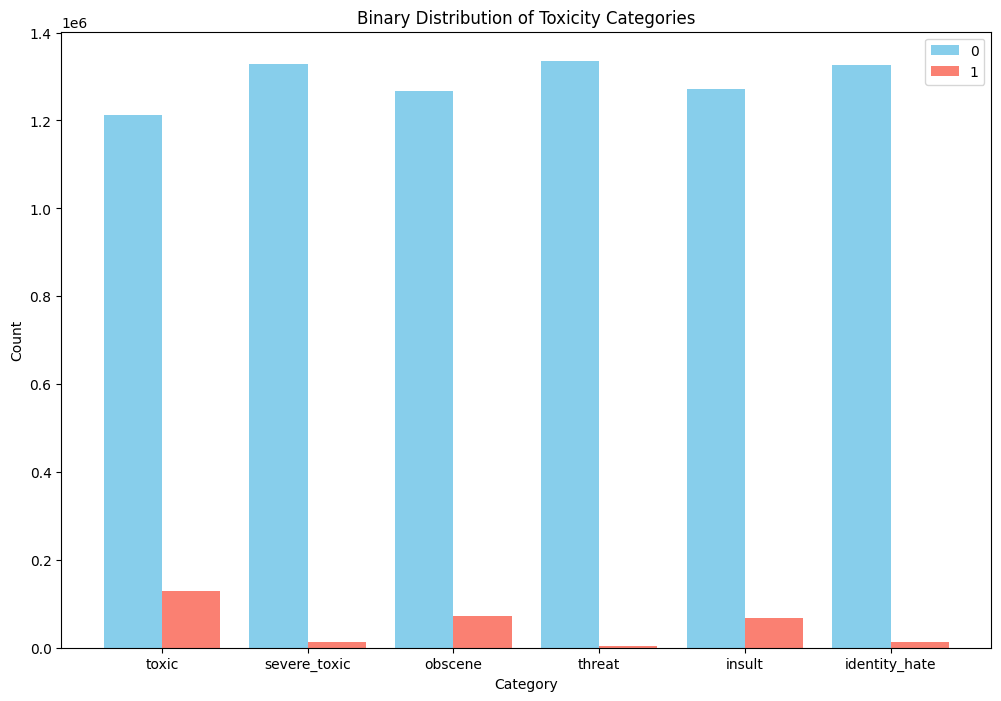

In [ ]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Calculate value counts for each category
value_counts = {cat: data_cleaned[cat].value_counts() for cat in categories}

# Prepare data for plotting
counts_0 = [value_counts[cat].get(0, 0) for cat in categories]
counts_1 = [value_counts[cat].get(1, 0) for cat in categories]

x = range(len(categories))
bar_width = 0.4

plt.figure(figsize=(12, 8))
plt.bar(x, counts_0, width=bar_width, label='0', color='skyblue', align='center')
plt.bar([p + bar_width for p in x], counts_1, width=bar_width, label='1', color='salmon', align='center')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Binary Distribution of Toxicity Categories')
plt.xticks([p + bar_width / 2 for p in x], categories)
plt.legend()

plt.show()

In [ ]:
target_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for label in target_labels:
    print(f'{label} distribution:')
    print(data_cleaned[label].value_counts())

toxic distribution:
toxic
0    1211365
1     128245
Name: count, dtype: int64
severe_toxic distribution:
severe_toxic
0    1327850
1      11760
Name: count, dtype: int64
obscene distribution:
obscene
0    1266871
1      72739
Name: count, dtype: int64
threat distribution:
threat
0    1335482
1       4128
Name: count, dtype: int64
insult distribution:
insult
0    1271878
1      67732
Name: count, dtype: int64
identity_hate distribution:
identity_hate
0    1326920
1      12690
Name: count, dtype: int64


In [ ]:

def undersample_label(df, target_label):
    X = df.drop(columns=[target_label])
    y = df[target_label]
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    resampled_df = pd.concat([X_res, y_res], axis=1)
    return resampled_df

# Apply undersampling to each label separately and concatenate results
resampled_dfs = [undersample_label(data_cleaned, label) for label in target_labels]

# Combine the resampled dataframes, ensuring no duplicates
df_resampled = pd.concat(resampled_dfs).drop_duplicates().reset_index(drop=True)

df_resampled.head()

,comment_text,language,severe_toxic,obscene,threat,insult,identity_hate,toxic
0,я никогда не участвовал в личной атаке хотя ва...,russian,0,0,0,0,0,0
1,kitabiaqdas kitabiaqdas dice libro central lib...,spanish,0,0,0,0,0,0
2,je pensais vous aimeriez savoir,french,0,0,0,0,0,0
3,sto facendo delle ricerche ciò che i media com...,italian,0,0,0,0,0,0
4,qu pasa hey amigo noticias tiempo despus retir...,spanish,0,0,0,0,0,0


In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450746 entries, 0 to 450745
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   450746 non-null  object
 1   language       450746 non-null  object
 2   severe_toxic   450746 non-null  int64 
 3   obscene        450746 non-null  int64 
 4   threat         450746 non-null  int64 
 5   insult         450746 non-null  int64 
 6   identity_hate  450746 non-null  int64 
 7   toxic          450746 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 27.5+ MB


In [ ]:
for label in target_labels:
    print(f'{label} distribution:')
    print(df_resampled[label].value_counts())

toxic distribution:
toxic
0    323240
1    127506
Name: count, dtype: int64
severe_toxic distribution:
severe_toxic
0    438987
1     11759
Name: count, dtype: int64
obscene distribution:
obscene
0    378051
1     72695
Name: count, dtype: int64
threat distribution:
threat
0    446618
1      4128
Name: count, dtype: int64
insult distribution:
insult
0    383050
1     67696
Name: count, dtype: int64
identity_hate distribution:
identity_hate
0    438056
1     12690
Name: count, dtype: int64


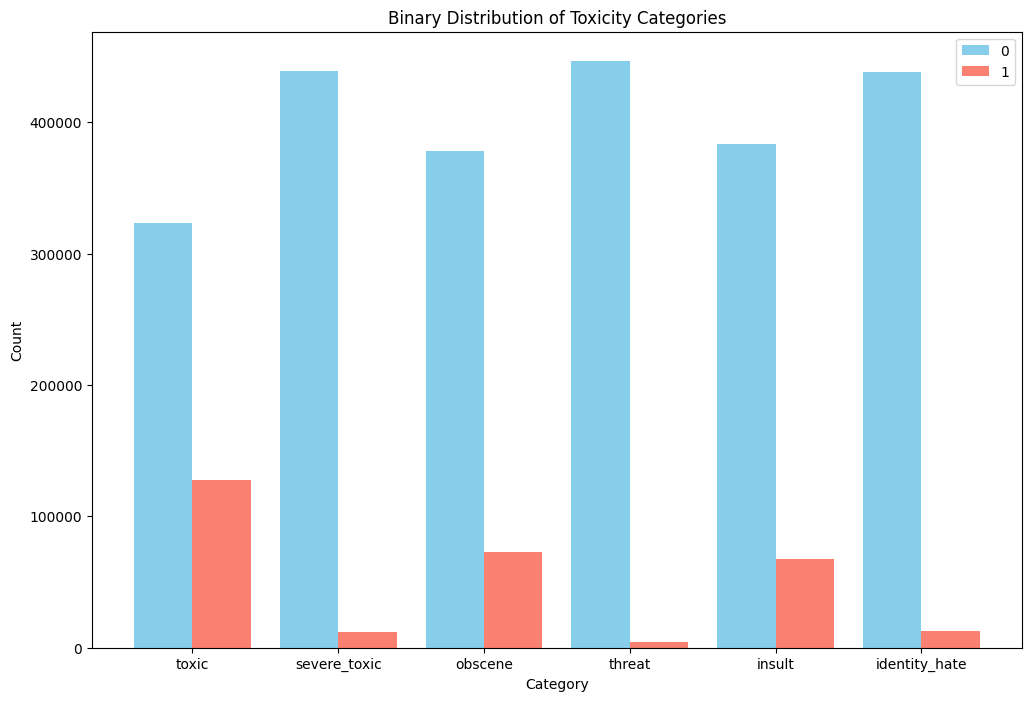

In [ ]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Calculate value counts for each category
value_counts = {cat: df_resampled[cat].value_counts() for cat in categories}

# Prepare data for plotting
counts_0 = [value_counts[cat].get(0, 0) for cat in categories]
counts_1 = [value_counts[cat].get(1, 0) for cat in categories]

# Plot the counts
x = range(len(categories))
bar_width = 0.4

plt.figure(figsize=(12, 8))
plt.bar(x, counts_0, width=bar_width, label='0', color='skyblue', align='center')
plt.bar([p + bar_width for p in x], counts_1, width=bar_width, label='1', color='salmon', align='center')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Binary Distribution of Toxicity Categories')
plt.xticks([p + bar_width / 2 for p in x], categories)
plt.legend()

plt.show()

### Remove stopwords

In [ ]:
def remove_stopwords(sentence, language):
    if pd.isnull(sentence):
        return ''
    tokens = sentence.split()  # Tokenize the sentence
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_dict.get(language, set())]  # Remove stopwords for the given language
    return ' '.join(filtered_tokens)  # Join the tokens back into a sentence

# Apply the function to the 'comment_text' column of the DataFrame


for language in stopwords_dict.keys():
    df_resampled['comment_text'] = df_resampled['comment_text'].apply(lambda x: remove_stopwords(x, language))


### WordCloud

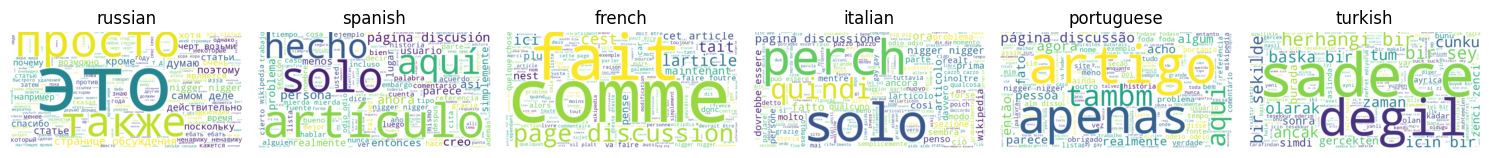

In [ ]:
languages = df_resampled['language'].unique()
n_languages = len(languages)
fig, axes = plt.subplots(nrows=1, ncols=n_languages, figsize=(15, 5))

for ax, language in zip(axes, languages):
    # Filter the data by language
    text = df_resampled[df_resampled['language'] == language]['comment_text'].str.cat(sep=' ')

    # Generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(language)
    ax.axis('off')

plt.tight_layout()
plt.show()

### Bar Graph

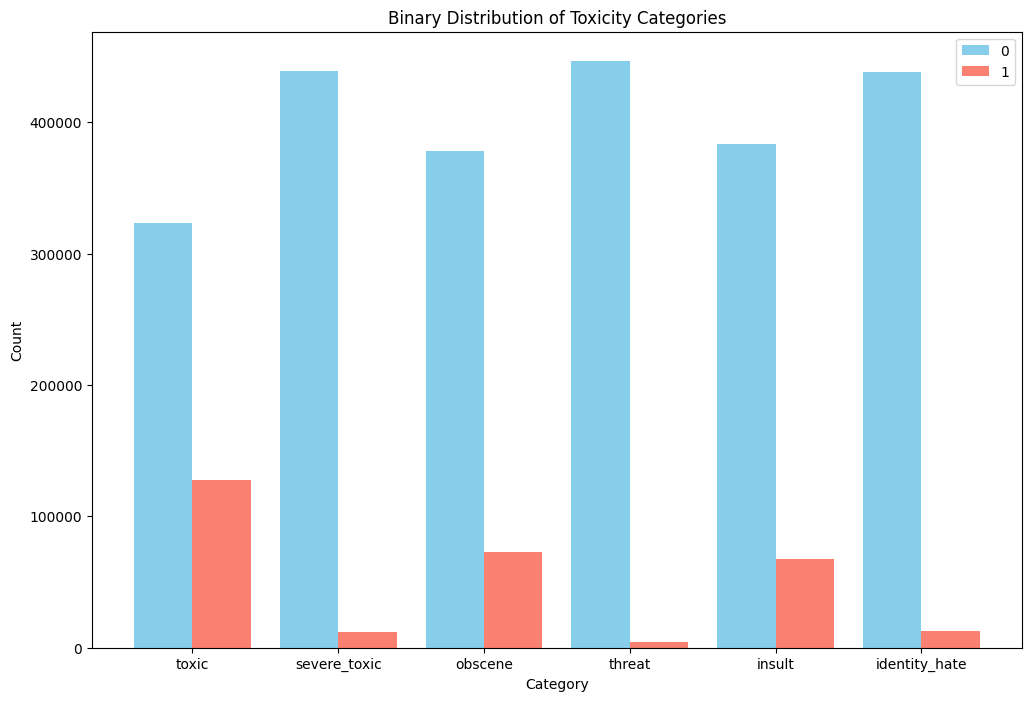

In [ ]:


categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Calculate value counts for each category
value_counts = {cat: df_resampled[cat].value_counts() for cat in categories}

# Prepare data for plotting
counts_0 = [value_counts[cat].get(0, 0) for cat in categories]
counts_1 = [value_counts[cat].get(1, 0) for cat in categories]

# Plot the counts
x = range(len(categories))
bar_width = 0.4

plt.figure(figsize=(12, 8))
plt.bar(x, counts_0, width=bar_width, label='0', color='skyblue', align='center')
plt.bar([p + bar_width for p in x], counts_1, width=bar_width, label='1', color='salmon', align='center')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Binary Distribution of Toxicity Categories')
plt.xticks([p + bar_width / 2 for p in x], categories)
plt.legend()

plt.show()

## Lemmatization

#### Spanish - French - Italian - Portugese

In [ ]:

# Load spaCy models for each language
models = {
    'spanish': spacy.load('es_core_news_sm', disable=['ner', 'parser']),
    'french': spacy.load('fr_core_news_sm', disable=['ner', 'parser']),
    'italian': spacy.load('it_core_news_sm', disable=['ner', 'parser']),
    'portuguese': spacy.load('pt_core_news_sm', disable=['ner', 'parser']),
    'russian': spacy.load('ru_core_news_sm', disable=['ner', 'parser'])
}


# Function for batch processing with lemmatization
def batch_lemmatize(sentences, nlp, language):
    lemmatized_sentences = []
    if language != 'turkish':
        for doc in nlp.pipe(sentences, batch_size=1000):  # Adjust batch_size as needed
            lemmatized_sentences.append(' '.join([token.lemma_ for token in doc]))
    else:
      for sentence in sentences:
        lemmatized_sentence = []
        for word in sentence.split():
            try:
                trnlp_word.setword(word)
                lemmatized_sentence.append(trnlp_word.get_base)
            except Exception:
                lemmatized_sentence.append(word)  # Use the original word if an error occurs
        print(lemmatized_sentence)
        lemmatized_sentences.append(' '.join(lemmatized_sentence))
    return lemmatized_sentences

# Function to process each group
def process_group(df, language):
    # Preprocess to handle missing values
    df['comment_text'] = df['comment_text'].fillna('')  # Replace NaN with empty string

    # Filter out non-string values (if any)
    df = df[df['comment_text'].apply(lambda x: isinstance(x, str))]

    # Apply batch lemmatization
    if language in models or language == 'turkish':
        df['comment_text_lemmatized'] = batch_lemmatize(df['comment_text'].tolist(), models.get(language, None), language)
    else:
        # Placeholder for unsupported languages
        df['comment_text_lemmatized'] = df['comment_text']
    return df

# Assuming df is your DataFrame
# Group by 'language' and apply lemmatization
df_lemmatized = pd.DataFrame()

for language, group in tqdm(df_resampled.groupby('language'), desc="Processing groups"):
    print(f"Processing language: {language}")
    df_processed = process_group(group, language)
    df_lemmatized = pd.concat([df_lemmatized, df_processed], ignore_index=True)

result = df_lemmatized.groupby('language').head(5)

# Display the result
print(result[['comment_text', 'comment_text_lemmatized', 'language']])


In [37]:
#df_lemmatized.to_csv('/content/drive/MyDrive/Colab_Notebooks/research/data_lemmatized_002.csv', index=False)

In [ ]:
#df_resampled = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/research/data_cleaned_04.csv')

In [32]:
df = df_lemmatized

# Modelling

## LTSM

In [33]:

# Word2Vec
sentences = [row.split() for row in df['comment_text_lemmatized'].astype(str)]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = word2vec_model.wv

# Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['comment_text_lemmatized'].astype(str))
sequences = tokenizer.texts_to_sequences(df['comment_text_lemmatized'].astype(str))
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Embedding matrix
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

# Splitting target
df['toxic'] = pd.to_numeric(df['toxic'], errors='coerce')
numeric_columns = ['toxic']
X = padded_sequences
y = df[numeric_columns].values

# Splitting train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM modelling
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    trainable=False))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

#Evaluating model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')



Epoch 1/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 403s 71ms/step - accuracy: 0.7940 - loss: 0.4574 - val_accuracy: 0.8756 - val_loss: 0.3015
Epoch 2/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 403s 71ms/step - accuracy: 0.8748 - loss: 0.2997 - val_accuracy: 0.8786 - val_loss: 0.2930
Epoch 3/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 403s 72ms/step - accuracy: 0.8790 - loss: 0.2890 - val_accuracy: 0.8792 - val_loss: 0.2896
Epoch 4/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 401s 71ms/step - accuracy: 0.8836 - loss: 0.2811 - val_accuracy: 0.8818 - val_loss: 0.2829
Epoch 5/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 402s 71ms/step - accuracy: 0.8855 - loss: 0.2753 - val_accuracy: 0.8826 - val_loss: 0.2811
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.8824 - loss: 0.2821
Test Accuracy: 0.8826067447662354


In [34]:

y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

2818/2818 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step
Precision: 0.8787334286741615
Recall: 0.8218461274429161
F1 Score: 0.843794023687093


## RNN

In [35]:

df['comment_text_lemmatized'] = df['comment_text_lemmatized'].astype(str)

# Train Word2Vec model
sentences = [row.split() for row in df['comment_text_lemmatized']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = word2vec_model.wv

# Tokenization and padding
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['comment_text_lemmatized'])

X = tokenizer.texts_to_sequences(df['comment_text_lemmatized'])
X = pad_sequences(X, maxlen=max_len)

# Check the shape of X
print(f'Shape of X: {X.shape}')

# Create embedding matrix
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

# Extract target labels
y = np.array(df['toxic'].tolist())


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    trainable=False))
model.add(SimpleRNN(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

y_pred = model.predict(X_test)


y_pred = (y_pred > 0.5).astype(int)


precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Shape of X: (450746, 100)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │      61,586,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,586,500 (234.93 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 61,586,500 (234.93 MB)

Epoch 1/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 77s 14ms/step - accuracy: 0.8015 - loss: 0.4516 - val_accuracy: 0.8302 - val_loss: 0.3964
Epoch 2/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 75s 13ms/step - accuracy: 0.8226 - loss: 0.4057 - val_accuracy: 0.8528 - val_loss: 0.3559
Epoch 3/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 76s 13ms/step - accuracy: 0.8301 - loss: 0.3954 - val_accuracy: 0.8527 - val_loss: 0.3498
Epoch 4/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 75s 13ms/step - accuracy: 0.8179 - loss: 0.4275 - val_accuracy: 0.8349 - val_loss: 0.3845
Epoch 5/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 76s 14ms/step - accuracy: 0.8278 - loss: 0.4010 - val_accuracy: 0.8364 - val_loss: 0.3845
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8351 - loss: 0.3868
Test Accuracy: 0.8364
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step
Precision: 0.814509558542706
Recall: 0.7605657470747917
F1 Score: 0.7800548717196397


# CNN

In [36]:

df_lemmatized['comment_text_lemmatized'] = df_lemmatized['comment_text_lemmatized'].astype(str)

# Word2Vec modelling
sentences = [row.split() for row in df_lemmatized['comment_text_lemmatized']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = word2vec_model.wv

# Tokenization and padding
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_lemmatized['comment_text_lemmatized'])

X = tokenizer.texts_to_sequences(df_lemmatized['comment_text_lemmatized'])
X = pad_sequences(X, maxlen=max_len)

# Embedding matrix
embedding_dim = 100
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

# Extract target labels
y = np.array(df_lemmatized['toxic'].tolist())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model with three Conv1D layers
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    trainable=False))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)


precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │      61,586,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,586,500 (234.93 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 61,586,500 (234.93 MB)

Epoch 1/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 190s 33ms/step - accuracy: 0.8441 - loss: 0.3661 - val_accuracy: 0.8762 - val_loss: 0.2967
Epoch 2/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 188s 33ms/step - accuracy: 0.8765 - loss: 0.2987 - val_accuracy: 0.8800 - val_loss: 0.2857
Epoch 3/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 188s 33ms/step - accuracy: 0.8816 - loss: 0.2892 - val_accuracy: 0.8797 - val_loss: 0.2886
Epoch 4/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 189s 34ms/step - accuracy: 0.8854 - loss: 0.2810 - val_accuracy: 0.8830 - val_loss: 0.2827
Epoch 5/5
5635/5635 ━━━━━━━━━━━━━━━━━━━━ 188s 33ms/step - accuracy: 0.8863 - loss: 0.2758 - val_accuracy: 0.8831 - val_loss: 0.2839
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8834 - loss: 0.2835
Test Accuracy: 0.8831
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step
Precision: 0.8713205133605673
Recall: 0.8307167730595568
F1 Score: 0.8475251049291557
